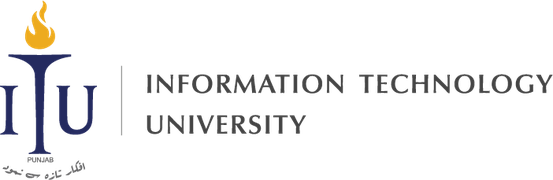
<h1><center>Assignment 1</center></h1>
<h2><center>Building an Information Retrieval System</center></h2>
In this assignment we will explore a way to rank the documents according to given query to get relevant documents (kind of a search engine). 

##### <h4>Instructions:</h4>
- DO NOT PLAGIARISE (This may result in zero grade in this assignment and further penalty will be applied to the final grade)
- Follow the instructions given in the code cells that are written, not following the instruction can also result in penalization
- In case of any query, you can email at MSDS19087@itu.edu.pk
- Remember! We will enter a query and you should print the ranked list of document names, also display the contents of the top 5 documents
- Submit your Assignment as a .ipynb (python notebook) file with your roll number as the file name. Like **"MSDS19087.ipynb"**
- Do not submit data and output files. **only submit the notebook**
- Write user-defined functions for each task. You can not use any library functions (such as sklearn, torch, TensorFlow, nltk, spacy, or other natural language processing libraries for the tasks such as tf, df, idf, tf-idf, cosine similarity, etc) other than basic functions (such as numpy, pandas, os, math)
- Late penalty for this assignment and all other assignments is a deduction of 10% of obtained marks every 12 hours. In case of any emergency send an email before the deadline stating the issue with proof. The assignment will not be accepted after 3 days of the deadline.
- **Any part you see is taking time in processing:**
    - To start just take a small sample of the dataset (let's say 10% or even smaller)
    - When the code is working fine, run it for the whole dataset and **must** save the output in a csv/text file to avoid waste of time in re-run the code

### Task 1:
- import relevant python packages  

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# write code to import other packages here

### Task 2
- Read the names of all text files given in the data folder
- Read all text files and save them in a list in a way that words of all files are saved in seperate lists
- All words must have all lower case letters
- Remove stop words (very common words such "this", "The", "is", you can search for stop words), punctuations marks or other special chracters or html tags (hint: use regular expression)

In [2]:
STOP_WORDS = ["i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now",]

In [3]:
# Write code here
parent = 'data/'
org_data = []
file_names = os.listdir(parent)
for fle in file_names:
    file_name = os.path.join(parent,fle)
    with open(file_name,'rb') as f:
        file_content = f.read()
        org_data.append(str(file_content))
        
print(len(org_data))

3000


In [4]:
word_data = []
for data in org_data:

    data = data.lower()
    # remove \r, \n
    data = re.sub(r'\\r',r' ',data)
    data = re.sub(r'\\n',r' ',data)

    # Remove Stop Words
    reg = "(\\b"+"\\b|\\b".join(STOP_WORDS)+"\\b)"
    data = re.sub(reg,r' ',data)
        
    # Remove extra space
    data = re.sub(r'\s+',r' ',data)
    
    word_data.append(data.split())    
    

### Task 3: Create a vocabulary 
- Get all unique words in all documents (corpus) and save them in a list 
- Get count of each word in whole corpus and save each word and its count in a dictionary
- Create a dictionary that assign each unique word a unique id (so that we can represent each word using a unique id)
- Create a dictionaty that assign each unique id a word (so that we can convert each id to back to the original word)
- Calculate some basic statistics too:
       - Total Number of Documents 
       - Total Number of Unique Words 
       - Total Number of Words in each Document 

In [5]:
# Write code here
t_data = []
dic_data = {}
word_id_data = {}
id_count_data = {}
id = 0

for data in word_data:
    t_data += data
    
for tt_data in t_data:
    if not tt_data in dic_data.keys():
        dic_data[tt_data] = 1
        word_id_data[tt_data] = id
        id_count_data[id] = 1
        id += 1
    else:
        dic_data[tt_data] += 1
        id_count_data[word_id_data[tt_data]] += 1


In [6]:
documents_count = len(word_data)
unqiueWord_count = len(id_count_data)
count_each_document = {}
for i in range(len(file_names)):
    count_each_document[file_names[i]] = len(word_data[i])

In [7]:
print(f'Total Number of Documents:{documents_count}')
print(f"Total Number of Unique Words:{unqiueWord_count}")

Total Number of Documents:3000
Total Number of Unique Words:191247


In [8]:
document_count_df = pd.DataFrame({'DocumentNames':count_each_document.keys(),'Count':count_each_document.values()})
document_count_df.head(5)

,DocumentNames,Count
0,J03-1002.pdf.txt,7023
1,E12-2003.pdf.txt,1599
2,D15-1272.pdf.txt,2566
3,E06-1043.pdf.txt,3299
4,E03-1061.pdf.txt,1289


### Task 4
- Calculate term frequency (for each word in each document)
    - Calcuate how many times each word is repeated in each document 
    - Divide word count by total number of words in the document 
    - Assign zero if word doesnt appear in the doccument 
    - t is the term or selected word
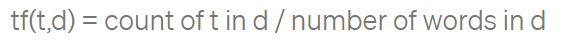
    

In [9]:
# Write code here
tf = {}
temp_counter = {}

for wrd in word_id_data.keys():
    temp_counter[wrd] = 0

for i in range(len(file_names)):
    words =  word_data[i]
    word_counter = temp_counter
    
        
    for wrd in words:
        if not wrd in word_counter.keys():
            word_counter[wrd] = 1
        else:
            word_counter[wrd] += 1
    
    tf[file_names[i]] = word_counter

### Task 5
- Calculate document frequency (for each word)
    - Calculate the total number documents in which each word appears  
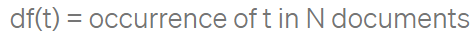

In [ ]:
# Write code here

### Task 6
- Calculate inverse document frequency for each word in the vocabulary
    - IDF is the inverse of the document frequency which measures the informativeness of term t
    - The formula to calculate the idf is as following 
    
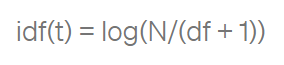

In [ ]:
# Write code here

### Task 7
- Calculate tf-idf for each word of each document 
    - Formula to calculate the tf-idf is as following:
        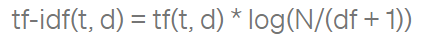

In [ ]:
# Write code here

### Task 8
- Create a sparse matrix that stores the frequency of each word in each document (this is something similar to what you have already done)
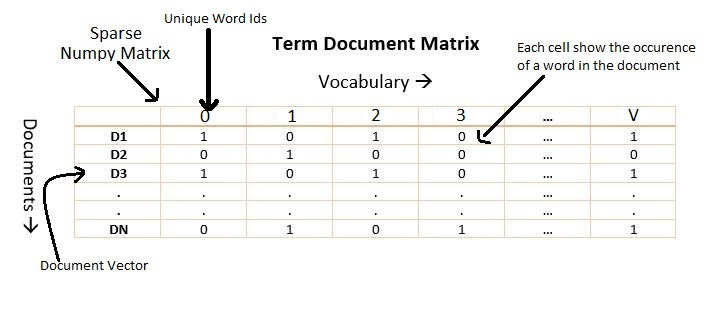

In [ ]:
# Write code here

### Task 9: Query matching using Cosine Similarity
- Take a search query from user as an input 
- Treat query as a document and:
    - Apply same preprocessing to the query
    - Calculate term frequencies in query
- Now use cosine similarity to calculate the similaraity of a document to the given query (use query (term frequencies) vector and sparse matrix containing term frequencies)
- Sort cosine similarities with all given documents to get most relevant documents 
- Display top 5 relevant documents and explore if they are actually relevant or not

In [ ]:
# Write code here

### Task 10: Query matching using Vector Space Model
- Calculate the similarities using vector space model in following way:
    - Apply same preprocessing to the query
    - Calculate the tfidf of the query in the same way (here term frequencies are the calculated using query while idf scores are same as calculated above)
    - Use cosine similarity between documents and query (based on tfidf) and rank the documents according to the similarity score 
- Display top 5 relevant documents and explore if they are actually relevant or not

In [ ]:
# Write code here